In [184]:
#Import Modules
import csv
import pandas as pd
import numpy as np
from arch import arch_model
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import cross_val_score


## Data Importing

In [185]:
# Q1.1 Import the data from the csv file

data = pd.read_csv("/Users/Anant/Desktop/WQU/Group Work/MScFE 650 MLF GWP Data.csv")
data

,Date,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
0,1-Jan-16,1390.716,2376.29,3525.9150,1068.79,106.70,105.38,1036.23,1663.27,59.47,...,2373.17,811.96,404.73,1507.8101,1255.75,108.40,11136.65,1148.37,1818.40,1949.70
1,8-Jan-16,1291.267,2260.85,3280.6683,1005.56,97.66,99.35,952.01,1586.18,54.63,...,2209.38,751.09,388.05,1437.6600,1177.76,101.00,10389.93,1075.30,1722.00,1831.88
2,15-Jan-16,1257.086,2217.50,3118.2981,985.38,93.54,97.32,904.64,1541.08,51.54,...,2095.60,720.23,344.45,1372.9800,1133.72,97.34,10042.32,1056.01,1692.43,1789.56
3,22-Jan-16,1254.167,2281.98,2935.0677,985.87,95.79,100.73,879.17,1582.10,51.15,...,2173.55,745.96,367.44,1350.0500,1160.48,99.21,10469.07,1076.48,1719.61,1814.12
4,29-Jan-16,1298.240,2462.19,3134.0840,1005.56,96.93,103.05,958.97,1638.84,52.13,...,2214.88,825.18,400.93,1375.1000,1239.58,100.06,10432.42,1087.17,1774.40,1843.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,25-Sep-20,988.345,1450.64,2252.2500,1166.97,84.95,64.63,1424.53,2018.62,94.77,...,2570.43,1162.66,554.53,1328.1400,1238.65,78.45,14099.14,1362.07,1641.51,3191.72
248,2-Oct-20,1037.211,1506.32,2265.7000,1128.45,84.89,66.00,1365.07,2031.76,97.19,...,2587.30,1172.45,543.08,1344.0300,1276.25,79.97,14355.01,1368.78,1658.14,3243.91
249,9-Oct-20,1075.670,1617.45,2214.3200,1187.29,90.01,69.35,1447.85,2076.53,101.03,...,2635.08,1212.32,553.32,1358.9700,1291.47,82.44,14602.91,1375.90,1687.56,3370.62
250,16-Oct-20,1068.089,1628.12,2194.6300,1200.97,88.66,66.90,1430.12,2058.60,103.13,...,2622.38,1172.05,537.28,1366.6100,1290.69,81.31,14558.72,1360.43,1655.95,3379.31


In [186]:
# Log series
df1 = np.log(data.drop(columns=['Date']))

# Log return series
df2 = df1 - df1.shift(1)
df2 = df2.dropna()
df2

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
1,-0.074195,-0.049800,-0.072093,-0.060983,-0.088529,-0.058924,-0.084769,-0.047457,-0.084889,-0.045825,...,-0.071515,-0.077926,-0.042086,-0.047642,-0.064119,-0.070708,-0.069404,-0.065744,-0.054471,-0.062333
2,-0.026828,-0.019360,-0.050760,-0.020273,-0.043103,-0.020644,-0.051038,-0.028845,-0.058225,-0.053627,...,-0.052872,-0.041955,-0.119185,-0.046033,-0.038110,-0.036911,-0.034029,-0.018102,-0.017321,-0.023373
3,-0.002325,0.028663,-0.060557,0.000497,0.023769,0.034439,-0.028559,0.026270,-0.007596,0.035461,...,0.036522,0.035101,0.064611,-0.016842,0.023329,0.019029,0.041617,0.019199,0.015932,0.013631
4,0.034538,0.076008,0.065606,0.019775,0.011831,0.022771,0.086882,0.035236,0.018978,0.021603,...,0.018836,0.100930,0.087227,0.018385,0.065939,0.008531,-0.003507,0.009882,0.031365,0.016272
5,-0.018352,0.006768,0.030297,-0.004625,-0.026342,-0.068473,0.024332,-0.007454,-0.024271,-0.078636,...,0.004343,0.009816,-0.032782,0.002767,-0.002245,-0.035295,-0.016709,-0.042321,-0.038795,-0.032605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-0.062581,-0.039489,-0.030012,0.021087,-0.054965,-0.058885,-0.067096,-0.005085,-0.038299,-0.005867,...,-0.036408,-0.038802,-0.055472,-0.010687,-0.024885,-0.042060,-0.027255,-0.027609,-0.028733,-0.005265
248,0.048259,0.037665,0.005954,-0.033566,-0.000707,0.020976,-0.042636,0.006488,0.025215,0.023742,...,0.006542,0.008385,-0.020864,0.011893,0.029904,0.019190,0.017985,0.004914,0.010080,0.016219
249,0.036408,0.071181,-0.022938,0.050828,0.058564,0.049511,0.058874,0.021796,0.038750,0.033707,...,0.018299,0.033440,0.018680,0.011054,0.011855,0.030419,0.017122,0.005188,0.017587,0.038317
250,-0.007073,0.006575,-0.008932,0.011456,-0.015112,-0.035967,-0.012321,-0.008672,0.020573,0.006148,...,-0.004831,-0.033782,-0.029417,0.005606,-0.000604,-0.013802,-0.003031,-0.011307,-0.018909,0.002575


## Average Data Summaries

In [187]:
# Q2.1 Calculate the mean of each series

avg = df2.mean()
avg.name = 'Mean'
avg = pd.DataFrame(avg)
avg

,Mean
LUXXX,-0.000969
MSCI ARGENTINA,-0.001529
BLP ORIENTE MEDIO,-0.001905
MSCI AUSTRALIA,0.000465
MSCI AUSTRIA,-0.000690
MSCI BELGIUM,-0.001837
MSCI BRAZIL,0.001416
MSCI CANADA,0.000810
MSCI CHINA,0.002209
MSCI DENMARK,0.001176


In [188]:
# Q2.2 Calculate the trimmed mean of each series, where trim=5%

Trim5 = stats.trim_mean(df2, 0.05)
Trim5

array([-2.56148383e-04,  2.14300686e-03, -1.06189857e-03,  1.49917575e-03,
        4.14663202e-04, -4.40057795e-04,  2.09894074e-03,  2.15362542e-03,
        2.92257557e-03,  2.57805057e-03,  2.67389528e-03,  8.83446487e-04,
        1.55215988e-03,  1.24466371e-03,  1.34948961e-03,  1.45251689e-03,
        9.72404119e-04,  1.22426942e-03,  2.05280222e-03,  5.49368415e-04,
        1.04771279e-03,  2.17168854e-03,  8.13002010e-05,  2.44297579e-03,
        2.53433817e-03,  1.17921720e-03,  2.07510942e-03,  2.86555906e-03,
       -3.54817030e-04,  6.88031414e-04, -1.12487013e-04,  2.08347534e-03,
        1.88499174e-03,  4.90509144e-04,  3.41379079e-03])

In [189]:
# Q2.3 Calculate the trimmed mean of each series, where trim=50%

median = stats.trim_mean(df2, 0.4999)
median

array([ 2.79551596e-04,  1.16256703e-03, -4.95348264e-04,  2.23051537e-03,
        0.00000000e+00,  6.99755114e-04,  4.16108534e-03,  2.84109837e-03,
        4.28590093e-03,  4.87433120e-03,  3.12125320e-03,  1.54390650e-03,
        2.19304662e-03,  3.11302411e-03,  1.20078923e-03,  2.91800616e-03,
        2.54965248e-03,  3.56818410e-03,  4.31784039e-03,  6.45994855e-04,
        2.38078099e-03,  2.35727899e-03, -1.94363931e-03,  3.53654798e-03,
        3.55182808e-03,  2.10886018e-03,  3.72760108e-03,  6.39061480e-03,
        8.68285642e-04, -7.06608913e-05,  7.73362015e-04,  2.45815559e-03,
        2.68702536e-03,  1.71776708e-03,  3.92414488e-03])

In [190]:
datasummary = avg
datasummary['TrimMean5'] = Trim5.tolist()
datasummary['Median'] = median.tolist()
datasummary

,Mean,TrimMean5,Median
LUXXX,-0.000969,-0.000256,0.000280
MSCI ARGENTINA,-0.001529,0.002143,0.001163
BLP ORIENTE MEDIO,-0.001905,-0.001062,-0.000495
MSCI AUSTRALIA,0.000465,0.001499,0.002231
MSCI AUSTRIA,-0.000690,0.000415,0.000000
MSCI BELGIUM,-0.001837,-0.000440,0.000700
MSCI BRAZIL,0.001416,0.002099,0.004161
MSCI CANADA,0.000810,0.002154,0.002841
MSCI CHINA,0.002209,0.002923,0.004286
MSCI DENMARK,0.001176,0.002578,0.004874


In [191]:
# 2.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 averages

weight = [0.5,0.2,0.3]
weighted_ret = weight[0]*datasummary['Mean'] + weight[1]*datasummary['TrimMean5'] + weight[2]*datasummary['Median']
weighted_ret

LUXXX                    -0.000452
MSCI ARGENTINA            0.000013
BLP ORIENTE MEDIO        -0.001314
MSCI AUSTRALIA            0.001202
MSCI AUSTRIA             -0.000262
MSCI BELGIUM             -0.000796
MSCI BRAZIL               0.002376
MSCI CANADA               0.001688
MSCI CHINA                0.002975
MSCI DENMARK              0.002566
MSCI EM ASIA              0.002368
MSCI EM EU-MIDE-AFRICA    0.000661
MSCI EM EUROPE            0.001016
MSCI EM LATIN AMERICA     0.001328
MSCI FINLAND              0.000824
MSCI FRANCE               0.001342
MSCI GERMANY              0.000987
MSCI HONG KONG            0.001581
MSCI INDIA                0.002396
MSCI ITALY               -0.000099
MSCI JAPAN                0.001017
MSCI KOREA                0.001821
MSCI MEXICO              -0.001197
MSCI NETHERLANDS          0.002239
MSCI NEW ZEALAND          0.002632
MSCI NORWAY               0.001064
MSCI PERU                 0.002340
MSCI RUSSIA               0.003113
MSCI SINGAPORE      

In [192]:
# 2.5 Rank the series, from highest expected return to lowest expected return using your weighted factor

weighted_ret.sort_values(ascending = False)

MSCI RUSSIA               0.003113
MSCI CHINA                0.002975
MSCI USA                  0.002944
MSCI NEW ZEALAND          0.002632
MSCI DENMARK              0.002566
MSCI INDIA                0.002396
MSCI BRAZIL               0.002376
MSCI EM ASIA              0.002368
MSCI PERU                 0.002340
MSCI NETHERLANDS          0.002239
MSCI KOREA                0.001821
MSCI CANADA               0.001688
MSCI SWEDEN               0.001676
MSCI HONG KONG            0.001581
MSCI SWITZERLAND          0.001487
MSCI FRANCE               0.001342
MSCI EM LATIN AMERICA     0.001328
MSCI AUSTRALIA            0.001202
MSCI NORWAY               0.001064
MSCI JAPAN                0.001017
MSCI EM EUROPE            0.001016
MSCI GERMANY              0.000987
MSCI FINLAND              0.000824
MSCI EM EU-MIDE-AFRICA    0.000661
MSCI UK                   0.000410
MSCI SOUTH AFRICA         0.000195
MSCI ARGENTINA            0.000013
MSCI SINGAPORE           -0.000015
MSCI ITALY          

## Volatility Data Summaries

In [193]:
# 3.1 For the log return series, compute a EWMA

df4 = pd.Series.ewm(df2, span=10, adjust = False).std()
EWMA = df4.mean()
EWMA.name = 'EWMA'
EWMA

LUXXX                     0.031236
MSCI ARGENTINA            0.052421
BLP ORIENTE MEDIO         0.026452
MSCI AUSTRALIA            0.019785
MSCI AUSTRIA              0.031829
MSCI BELGIUM              0.026797
MSCI BRAZIL               0.044126
MSCI CANADA               0.017458
MSCI CHINA                0.028300
MSCI DENMARK              0.022730
MSCI EM ASIA              0.023440
MSCI EM EU-MIDE-AFRICA    0.028380
MSCI EM EUROPE            0.028808
MSCI EM LATIN AMERICA     0.035406
MSCI FINLAND              0.024169
MSCI FRANCE               0.024128
MSCI GERMANY              0.025610
MSCI HONG KONG            0.022630
MSCI INDIA                0.020574
MSCI ITALY                0.028654
MSCI JAPAN                0.026161
MSCI KOREA                0.022570
MSCI MEXICO               0.033840
MSCI NETHERLANDS          0.022646
MSCI NEW ZEALAND          0.020288
MSCI NORWAY               0.021446
MSCI PERU                 0.032372
MSCI RUSSIA               0.034130
MSCI SINGAPORE      

In [194]:
# 3.2 For the log series, run a GARCH(1,1) model

variances = []
for column in df1.columns:
    garch11 = arch_model(df1[column].values, p=1, q=1, vol = 'GARCH')
    res = garch11.fit(update_freq=10)
    variance = res.conditional_volatility.mean()
    variances.append([column,variance])
variances = pd.Series(dict(variances))
variances.name = 'GARCH11'
variances.tail

Iteration:     10,   Func. Count:     82,   Neg. LLF: -229.86625176407625
Optimization terminated successfully    (Exit mode 0)
            Current function value: -236.84114680200233
            Iterations: 22
            Function evaluations: 128
            Gradient evaluations: 19
Iteration:     10,   Func. Count:     64,   Neg. LLF: -6.354319144976454
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6.770250787439267
            Iterations: 16
            Function evaluations: 93
            Gradient evaluations: 16
Iteration:     10,   Func. Count:     69,   Neg. LLF: -75.89346199728675
Iteration:     20,   Func. Count:    129,   Neg. LLF: -43.46847228233966
Optimization terminated successfully    (Exit mode 0)
            Current function value: -219.60781207558935
            Iterations: 29
            Function evaluations: 176
            Gradient evaluations: 29
Optimization terminated successfully    (Exit mode 0)
            Current

Iteration:     20,   Func. Count:    150,   Neg. LLF: -371.6637604576044
Optimization terminated successfully    (Exit mode 0)
            Current function value: -371.6637604576044
            Iterations: 25
            Function evaluations: 154
            Gradient evaluations: 21
Optimization terminated successfully    (Exit mode 0)
            Current function value: -328.23504527816965
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: -371.4143689743553
            Iterations: 7
            Function evaluations: 30
            Gradient evaluations: 3
Iteration:     10,   Func. Count:     67,   Neg. LLF: -220.69326967060493
Optimization terminated successfully    (Exit mode 0)
            Current function value: -232.5665559788303
            Iterations: 15
            Function evaluations: 94
            Gradient evaluations: 15


<bound method NDFrame.tail of LUXXX                     0.156624
MSCI ARGENTINA            0.316206
BLP ORIENTE MEDIO         0.164573
MSCI AUSTRALIA            0.070410
MSCI AUSTRIA              0.167786
MSCI BELGIUM              0.111176
MSCI BRAZIL               0.189752
MSCI CANADA               0.066361
MSCI CHINA                0.148548
MSCI DENMARK              0.082994
MSCI EM ASIA              0.112103
MSCI EM EU-MIDE-AFRICA    0.090986
MSCI EM EUROPE            0.101512
MSCI EM LATIN AMERICA     0.132524
MSCI FINLAND              0.071970
MSCI FRANCE               0.088869
MSCI GERMANY              0.079799
MSCI HONG KONG            0.098090
MSCI INDIA                0.110865
MSCI ITALY                0.102399
MSCI JAPAN                0.076434
MSCI KOREA                0.099871
MSCI MEXICO               0.139406
MSCI NETHERLANDS          0.095896
MSCI NEW ZEALAND          0.114465
MSCI NORWAY               0.104290
MSCI PERU                 0.188105
MSCI RUSSIA              

In [195]:
# 3.3 For the price series, compute the 1-month range (high price minus low price over past 4 weeks)

df3 = np.log(data.rolling(4).max()) - np.log(data.rolling(4).min())
df3 = df3.dropna()
Range = df3.mean()
Range.name = 'Range'
Range

LUXXX                     0.053367
MSCI ARGENTINA            0.093725
BLP ORIENTE MEDIO         0.045443
MSCI AUSTRALIA            0.033973
MSCI AUSTRIA              0.055549
MSCI BELGIUM              0.044584
MSCI BRAZIL               0.082557
MSCI CANADA               0.030553
MSCI CHINA                0.051899
MSCI DENMARK              0.039874
MSCI EM ASIA              0.042528
MSCI EM EU-MIDE-AFRICA    0.049623
MSCI EM EUROPE            0.051605
MSCI EM LATIN AMERICA     0.063709
MSCI FINLAND              0.041239
MSCI FRANCE               0.040641
MSCI GERMANY              0.043266
MSCI HONG KONG            0.041658
MSCI INDIA                0.038100
MSCI ITALY                0.051397
MSCI JAPAN                0.043752
MSCI KOREA                0.040862
MSCI MEXICO               0.060561
MSCI NETHERLANDS          0.038911
MSCI NEW ZEALAND          0.036938
MSCI NORWAY               0.037017
MSCI PERU                 0.057135
MSCI RUSSIA               0.062018
MSCI SINGAPORE      

In [196]:
volsummary = pd.merge(EWMA, variances, right_index = True, left_index = True)
volsummary = volsummary.join(Range)
volsummary

,EWMA,GARCH11,Range
LUXXX,0.031236,0.156624,0.053367
MSCI ARGENTINA,0.052421,0.316206,0.093725
BLP ORIENTE MEDIO,0.026452,0.164573,0.045443
MSCI AUSTRALIA,0.019785,0.070410,0.033973
MSCI AUSTRIA,0.031829,0.167786,0.055549
MSCI BELGIUM,0.026797,0.111176,0.044584
MSCI BRAZIL,0.044126,0.189752,0.082557
MSCI CANADA,0.017458,0.066361,0.030553
MSCI CHINA,0.028300,0.148548,0.051899
MSCI DENMARK,0.022730,0.082994,0.039874


In [197]:
# 3.4 Using subjective weights, apply 3 probabilities (that sum to 1) for each of the 3 vol measures

vol_weight = [0.5,0.2,0.3]
weighted_vol = vol_weight[0]*volsummary['EWMA'] + vol_weight[1]*volsummary['GARCH11'] + vol_weight[2]*volsummary['Range']
weighted_vol

LUXXX                     0.062953
MSCI ARGENTINA            0.117569
BLP ORIENTE MEDIO         0.059773
MSCI AUSTRALIA            0.034167
MSCI AUSTRIA              0.066136
MSCI BELGIUM              0.049009
MSCI BRAZIL               0.084781
MSCI CANADA               0.031167
MSCI CHINA                0.059429
MSCI DENMARK              0.039926
MSCI EM ASIA              0.046899
MSCI EM EU-MIDE-AFRICA    0.047274
MSCI EM EUROPE            0.050188
MSCI EM LATIN AMERICA     0.063320
MSCI FINLAND              0.038850
MSCI FRANCE               0.042030
MSCI GERMANY              0.041744
MSCI HONG KONG            0.043431
MSCI INDIA                0.043890
MSCI ITALY                0.050226
MSCI JAPAN                0.041493
MSCI KOREA                0.043518
MSCI MEXICO               0.062969
MSCI NETHERLANDS          0.042176
MSCI NEW ZEALAND          0.044118
MSCI NORWAY               0.042686
MSCI PERU                 0.070948
MSCI RUSSIA               0.060480
MSCI SINGAPORE      

In [198]:
# 3.5 Rank the series, from highest volatility to lowest volatility using your weighted factor.
# For GARCH, use the unconditional variance as the average.
# For EWMA and hi-minus-low, you may average the time series of volatilities to be able to get single-number summaries for each model

weighted_vol.sort_values(ascending = False)

MSCI ARGENTINA            0.117569
MSCI BRAZIL               0.084781
MSCI PERU                 0.070948
MSCI AUSTRIA              0.066136
MSCI EM LATIN AMERICA     0.063320
MSCI MEXICO               0.062969
LUXXX                     0.062953
MSCI RUSSIA               0.060480
BLP ORIENTE MEDIO         0.059773
MSCI CHINA                0.059429
MSCI ITALY                0.050226
MSCI EM EUROPE            0.050188
MSCI BELGIUM              0.049009
MSCI USA                  0.047609
MSCI EM EU-MIDE-AFRICA    0.047274
MSCI SPAIN                0.047107
MSCI EM ASIA              0.046899
MSCI NEW ZEALAND          0.044118
MSCI INDIA                0.043890
MSCI KOREA                0.043518
MSCI HONG KONG            0.043431
MSCI NORWAY               0.042686
MSCI NETHERLANDS          0.042176
MSCI FRANCE               0.042030
MSCI GERMANY              0.041744
MSCI JAPAN                0.041493
MSCI DENMARK              0.039926
MSCI SINGAPORE            0.039139
MSCI SWEDEN         

## Data Visualizing: Heat Maps

In [199]:
# 4.1 Write a Python function to compute a heat map of the correlations.
# Be sure to show the scale using colors that range from blue for low values to red for high values.

# Using pandas function to compute our correlation
corr = data.corr(method='pearson')

## We have Created a correlation plot
corr.style.background_gradient(cmap='coolwarm')

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,MSCI EM ASIA,MSCI EM EU-MIDE-AFRICA,MSCI EM EUROPE,MSCI EM LATIN AMERICA,MSCI FINLAND,MSCI FRANCE,MSCI GERMANY,MSCI HONG KONG,MSCI INDIA,MSCI ITALY,MSCI JAPAN,MSCI KOREA,MSCI MEXICO,MSCI NETHERLANDS,MSCI NEW ZEALAND,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
LUXXX,1.000000,0.754584,0.823881,0.046895,0.674894,0.850111,0.337350,0.133539,-0.192526,-0.676507,-0.045439,0.677351,0.380714,0.601071,0.119269,0.167161,0.557645,0.193620,-0.152044,0.397034,0.224822,0.174025,0.859403,-0.346658,-0.734921,0.168444,0.349905,-0.099556,0.556819,0.527276,0.797206,-0.147922,-0.483619,0.754859,-0.462818
MSCI ARGENTINA,0.754584,1.000000,0.740835,-0.160676,0.604493,0.747766,0.260126,-0.047239,-0.000917,-0.474811,0.110893,0.678930,0.350046,0.510696,0.010117,0.015244,0.508243,0.218971,-0.203116,0.371382,0.188907,0.310811,0.759354,-0.336182,-0.713526,0.026683,0.242801,-0.225743,0.501144,0.607563,0.661643,-0.209572,-0.459191,0.517648,-0.461817
BLP ORIENTE MEDIO,0.823881,0.740835,1.000000,-0.124534,0.387526,0.925401,0.144240,-0.114781,-0.449813,-0.616805,-0.312487,0.492296,0.222905,0.396939,-0.197143,-0.069617,0.359587,-0.111512,-0.424088,0.261513,-0.088410,-0.094217,0.823201,-0.485341,-0.727424,-0.184801,0.002905,-0.265565,0.318689,0.402231,0.646010,-0.340203,-0.549976,0.516283,-0.652986
MSCI AUSTRALIA,0.046895,-0.160676,-0.124534,1.000000,0.516601,-0.027924,0.755042,0.916125,0.536852,0.284185,0.599384,0.508376,0.765606,0.624283,0.718873,0.921855,0.596349,0.735227,0.825480,0.703030,0.675393,0.540544,0.017388,0.771409,0.445050,0.810983,0.714497,0.894720,0.648469,0.458925,0.445205,0.775572,0.755159,0.607045,0.715744
MSCI AUSTRIA,0.674894,0.604493,0.387526,0.516601,1.000000,0.495019,0.731040,0.562506,0.438279,-0.300536,0.550032,0.888062,0.813588,0.856685,0.591328,0.708573,0.801413,0.762312,0.454721,0.829645,0.764734,0.678859,0.605188,0.248228,-0.359425,0.752971,0.825097,0.437568,0.934414,0.725589,0.876846,0.355420,0.122654,0.876490,0.141123
MSCI BELGIUM,0.850111,0.747766,0.925401,-0.027924,0.495019,1.000000,0.209736,-0.036849,-0.369143,-0.616392,-0.230014,0.581903,0.304030,0.487311,-0.067410,0.049484,0.416299,0.037509,-0.304333,0.376750,0.000366,-0.030710,0.899776,-0.434554,-0.744533,-0.046238,0.139077,-0.201364,0.444066,0.547095,0.724709,-0.302931,-0.500430,0.627655,-0.602246
MSCI BRAZIL,0.337350,0.260126,0.144240,0.755042,0.731040,0.209736,1.000000,0.732142,0.465766,-0.083163,0.562476,0.811979,0.910710,0.937938,0.556716,0.762449,0.609400,0.808712,0.654698,0.701297,0.606018,0.551653,0.294600,0.463748,0.043793,0.768825,0.865784,0.786482,0.810813,0.622795,0.631839,0.511825,0.426602,0.749572,0.408112
MSCI CANADA,0.133539,-0.047239,-0.114781,0.916125,0.562506,-0.036849,0.732142,1.000000,0.676746,0.335889,0.741687,0.555424,0.744150,0.615089,0.783045,0.902872,0.731081,0.771960,0.845175,0.663895,0.770054,0.708383,0.008069,0.806199,0.453717,0.820085,0.729537,0.849771,0.624717,0.541088,0.428865,0.857026,0.724269,0.623534,0.759718
MSCI CHINA,-0.192526,-0.000917,-0.449813,0.536852,0.438279,-0.369143,0.465766,0.676746,1.000000,0.602393,0.980782,0.377255,0.518319,0.337513,0.731391,0.667324,0.561679,0.755195,0.810124,0.517451,0.786816,0.891796,-0.217102,0.814460,0.518594,0.683251,0.578218,0.590822,0.440631,0.417123,0.114691,0.785007,0.705410,0.202909,0.822201
MSCI DENMARK,-0.676507,-0.474811,-0.616805,0.284185,-0.300536,-0.616392,-0.083163,0.335889,0.602393,1.000000,0.537414,-0.275134,-0.002492,-0.292335,0.370449,0.272837,0.101663,0.111802,0.499613,0.060431,0.268285,0.400754,-0.552746,0.750802,0.862406,0.116178,-0.117812,0.328008,-0.235455,-0.063860,-0.425734,0.654080,0.766011,-0.401304,0.763004


## Unsupervised Learning: Clustering

In [200]:
# 5.1 Calculate the Euclidean distance matrix for all 35 series

distances = pdist(df2.values, metric='euclidean')
dist_matrix = squareform(distances)
dist_matrix

array([[0.        , 0.2270223 , 0.47122577, ..., 0.58329552, 0.34806958,
        0.43238105],
       [0.2270223 , 0.        , 0.34683588, ..., 0.41760291, 0.20974511,
        0.295381  ],
       [0.47122577, 0.34683588, 0.        , ..., 0.21333371, 0.20849398,
        0.1971874 ],
       ...,
       [0.58329552, 0.41760291, 0.21333371, ..., 0.        , 0.26760846,
        0.19910706],
       [0.34806958, 0.20974511, 0.20849398, ..., 0.26760846, 0.        ,
        0.16871859],
       [0.43238105, 0.295381  , 0.1971874 , ..., 0.19910706, 0.16871859,
        0.        ]])

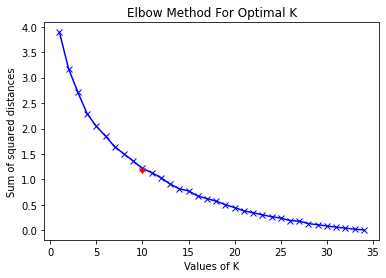

Centroids
[[-0.07526431 -0.02956781  0.02613437 ...  0.02704316 -0.00655015
  -0.01335462]
 [-0.0666051  -0.03906926 -0.0002203  ...  0.03845656  0.00435647
   0.00827748]
 [-0.0497996  -0.01936041  0.02866305 ...  0.07118124  0.00657514
  -0.00572231]
 ...
 [-0.06233275 -0.02337298  0.01363072 ...  0.03831731  0.00257484
  -0.00604908]
 [-0.0662722  -0.01804763  0.03891749 ...  0.02244265  0.00490042
  -0.02427431]
 [-0.0848888  -0.05822498 -0.00759571 ...  0.03874968  0.02057283
   0.00396768]]
Grouping
[8 2 6 1 8 1 3 1 0 1 0 4 5 3 1 1 1 0 0 1 1 0 4 1 1 1 7 5 0 4 1 1 1 1 1]


In [201]:
# 5.2 Run a k-means cluster on the 35 return series

# Fit KMeans model
Sum_of_squared_distances = []
K = range(1,35)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df2.T)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.plot(10, Sum_of_squared_distances[9], marker=11, color='Red')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal K')
plt.show()

# Print Centroids
centres = kmeans.cluster_centers_
print("Centroids")
print(centres)

# Print Grouping
kmeans = KMeans(n_clusters=9)
kmeans.fit(df2.T)
groups = kmeans.labels_
print("Grouping")
print(groups)

5.3 Justify your choice of k

As seen from the figure above, 10 clusters appears to provide the best balance between fit and number of clusters, as it satisfies the 'elbow method' approach visually.

In [202]:
# 5.4 Normalize each data series. Subtract each series by the weighted average from part 2.4.
#Then divide this difference by the weighted volatility from part 3.4

df5 = (df2 - weighted_ret)/weighted_vol
df5

,LUXXX,MSCI ARGENTINA,BLP ORIENTE MEDIO,MSCI AUSTRALIA,MSCI AUSTRIA,MSCI BELGIUM,MSCI BRAZIL,MSCI CANADA,MSCI CHINA,MSCI DENMARK,...,MSCI NORWAY,MSCI PERU,MSCI RUSSIA,MSCI SINGAPORE,MSCI SOUTH AFRICA,MSCI SPAIN,MSCI SWEDEN,MSCI SWITZERLAND,MSCI UK,MSCI USA
1,-1.171406,-0.423686,-1.184125,-1.820029,-1.334627,-1.186059,-1.027888,-1.576840,-1.478461,-1.212009,...,-1.700303,-1.131337,-0.747333,-1.216878,-1.663326,-1.493538,-1.824691,-1.868560,-1.505449,-1.371090
2,-0.418980,-0.164781,-0.827226,-0.628513,-0.647769,-0.404989,-0.630034,-0.979674,-1.029795,-1.407419,...,-1.263562,-0.624333,-2.022128,-1.175785,-0.990672,-0.776089,-0.916574,-0.544437,-0.486394,-0.552763
3,-0.029754,0.243689,-0.991130,-0.020619,0.363357,0.718960,-0.364883,0.788702,-0.177868,0.823892,...,0.830666,0.461767,1.016845,-0.429941,0.598323,0.411400,1.025318,0.492275,0.425781,0.224477
4,0.555807,0.646386,1.119565,0.543623,0.182845,0.480871,0.996751,1.076379,0.269283,0.476792,...,0.416351,1.389608,1.390784,0.470112,1.700321,0.188555,-0.133050,0.233318,0.849117,0.279946
5,-0.284346,0.057456,0.528848,-0.170537,-0.394340,-1.380906,0.258973,-0.293322,-0.458454,-2.033805,...,0.076812,0.105374,-0.593489,0.071069,-0.063108,-0.741790,-0.471965,-1.217559,-1.075455,-0.746674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-0.986921,-0.335986,-0.480125,0.582005,-0.827130,-1.185259,-0.819437,-0.217309,-0.694506,-0.211227,...,-0.877871,-0.579891,-0.968662,-0.272682,-0.648625,-0.885408,-0.742670,-0.808680,-0.799443,-0.172424
248,0.773763,0.320255,0.121589,-1.017581,-0.006723,0.444253,-0.530928,0.154012,0.374229,0.530378,...,0.128321,0.085203,-0.396444,0.304246,0.768360,0.414823,0.418670,0.095260,0.265247,0.278852
249,0.585519,0.605334,-0.361778,1.452493,0.889473,1.026501,0.666399,0.645159,0.601975,0.779959,...,0.403752,0.438354,0.257397,0.282820,0.301563,0.653197,0.396506,0.102875,0.471181,0.743005
250,-0.105174,0.055817,-0.127451,0.300133,-0.224537,-0.717640,-0.173360,-0.332415,0.296117,0.089726,...,-0.138112,-0.509131,-0.537861,0.143614,-0.020666,-0.285532,-0.120825,-0.355588,-0.529949,-0.007745


In [203]:
# 5.5 Using the normalized data series, re-calculate the Euclidean distance matrix for all 35 series

distances_norm = pdist(df2.values, metric='euclidean')
dist_matrix_norm = squareform(distances_norm)
dist_matrix_norm

array([[0.        , 0.2270223 , 0.47122577, ..., 0.58329552, 0.34806958,
        0.43238105],
       [0.2270223 , 0.        , 0.34683588, ..., 0.41760291, 0.20974511,
        0.295381  ],
       [0.47122577, 0.34683588, 0.        , ..., 0.21333371, 0.20849398,
        0.1971874 ],
       ...,
       [0.58329552, 0.41760291, 0.21333371, ..., 0.        , 0.26760846,
        0.19910706],
       [0.34806958, 0.20974511, 0.20849398, ..., 0.26760846, 0.        ,
        0.16871859],
       [0.43238105, 0.295381  , 0.1971874 , ..., 0.19910706, 0.16871859,
        0.        ]])

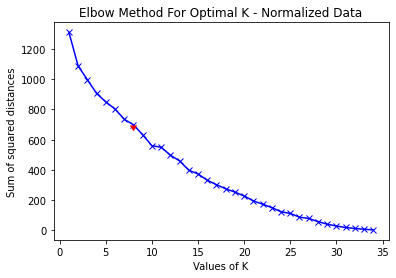

Centroids
[[-1.02809511 -0.50783065 -0.25325827 ...  0.7110442  -0.36481816
   0.17807131]
 [-2.07259448 -0.76792098  0.52689989 ...  0.62777797 -0.24101379
  -0.56997517]
 [-1.22495628 -0.55875759 -0.21754156 ...  0.77193952 -0.2040706
   0.45802539]
 ...
 [-1.62441003 -0.48099322  0.86966413 ...  0.4790414   0.0631107
  -0.62862937]
 [-1.06534941 -1.26354142  0.30356436 ...  0.33636189 -0.67908403
   0.32425663]
 [-1.47846123 -1.02979521 -0.17786824 ...  0.60197495  0.29611727
   0.01670636]]
Grouping
[5 6 2 4 1 1 0 4 5 7 5 3 3 0 1 1 1 5 2 1 1 5 3 1 7 7 0 3 5 3 1 1 7 1 4]


In [204]:
# 5.6 Using the normalized data series, run a k-means cluster on the 35 transformed variables

# Fit KMeans model
Sum_of_squared_distances = []
K = range(1,35)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df5.T)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.plot(8, Sum_of_squared_distances[7], marker=11, color='Red')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances') 
plt.title('Elbow Method For Optimal K - Normalized Data')
plt.show()

# Print Centroids
centres_norm = kmeans.cluster_centers_
print("Centroids")
print(centres_norm)

# Print Grouping
kmeans = KMeans(n_clusters=8)
kmeans.fit(df5.T)
groups_norm = kmeans.labels_
print("Grouping")
print(groups_norm)

5.7 Justify your choice of k

As seen from the figure above, we see good clustering even with 8 clusters using normalized data.

5.8 Were the 2 k values the same?

The two K values were different. Normalized data gives a lower numbers of clusters as it gives improved clustering.

5.9 Did the grouping of the series change as a result of your normalization?

The grouping data above confirms that the grouping of the series has changed after the data was normalized.

## Data Selection

In [205]:
# Q 6.1  Choose one of the 35 variables to serve as your response variable (e.g. LUXXX).
# You may choose the same one that your group used in the previous assignment.

# Copy the raw data and drop the Date column
regress_data = data.copy(deep=True)
regress_data.drop('Date', axis= 1, inplace=True)

# Extract out the X and Y data
X = regress_data.drop('LUXXX', axis = 1) ## controlling variable
Y = regress_data.LUXXX ## target Variable

## Compare unsupervised and supervised

7.1 What is the difference between unsupervised learning and supervised learning?

Supervised and unsupervised learning are examples of two different types of machine learning model approach. They differ in the way the models are trained and the condition of the training data required. The key differences are: 

1. The need for labeled data in supervised machine learning.
2. Supervised machine learning is generally used to classify data or make predictions, whereas unsupervised learning is generally used to understand relationships within datasets. 
3. Supervised machine learning is much more resource-intensive because of the need for labeled data and human oversight. Unsupervised machine learning is more of a hands-off approach.
4. On the other hand, in unsupervised machine learning it can be more difficult to reach adequate levels of accuracy because of less human oversight.

7.2 Which is clustering?  Which is CART?  Which is SVM?

1. Clustering is an unsupervised learning technique as it identifies patterns in unlabeled input data and clusters them into groups of data, where data points in each group have some similarities.

2. CART (Classification and Regression Trees) can be used for both classification and regression problems. With classification, we attempt to predict a class label, while regression is used to predict a numerical label. Essentially both methods are decisions tress and in order to develop a Decision Tree model, sufficient training examples with 'correct answers' are used to train the model. Hence CART fall under the supervised branch of machine learning algorithms. 

3. SVM is also a supervised learning method that can be used for classification as well as regression problems. SVM involves enriching the dimensionality to find a hyper-plane boundary to determine the category of the input data. SVM maps training examples to points in space so as to maximize the width of the gap between the two categories, hence it is a supervised learning algorithm.

## Compare and Contrast CART and SVM

8.1 What do the CART and SVM have in common? Be specific as to how they cut the dimensional space

Both CART and SVM are supervised machine learning techniques. They can be used for regression as well as for classification. Thus both are used to divide data at each 'level' or 'hyper-plane'. The biggest difference between the two algorithms is that SVM uses the kernel trick to turn a linearly non-separable problem into a linearly separable one (unless of course we use the linear kernel), while CART (decision trees) split the input space into hyper-rectangles according to the target. In other words, while SVM splits the space into sub-spaces separated by hyperplanes, CART being a decision tree, splits the data at each node until we reach the individual leaves of the tree.

8.2 How do the CART and SVM methodologies differ?

SVM is based on statistical learning theory. The learning theory developed in order to solve pattern recognition problems. SVM separates the classes with a decision surface that maximizes the margin between the classes. The surface is often called the optimal hyperplane and the data points closest to the hyperplane are called support vectors. The support vectors are the critical elements of the training set.

On the other hand, CART being a decision tree, has its origin in machine learning theory. Unlike other classification approaches that use a set of features (or bands) jointly to perform classification in a single decision step, the decision tree is based on a multistage or hierarchical decision scheme or a tree like structure. The tree is composed of a root node (containing all data), a set of internal nodes (splits) and a set of terminal nodes (leaves). Each node of the decision tree structure makes a binary decision that separates either one class or some of the classes from the remaining classes. The processing is generally carried out by moving down the tree until the leaf node is reached.

CART (Decision trees) is  better for categorical data and it deals collinearity better than SVM. However, if we have sparse data, then SVM performs better.

## Classification and Regression Trees (CART)

In [206]:
# Utility function to run cross-validation on Classification Tree

def run_cross_validation_on_class_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth, random_state=123)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [207]:
# Utility function to run cross-validation on Regression Tree

def run_cross_validation_on_reg_trees(X, y, tree_depths, cv=5, scoring='r2'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []

    for depth in tree_depths:
        tree_model = DecisionTreeRegressor(max_depth=depth, random_state=123)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))

    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)

    return cv_scores_mean, cv_scores_std, accuracy_scores

In [208]:
# Utility function to plot cross-validation results

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title, score):

    fig, ax = plt.subplots(1,1, figsize=(12,6))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation score', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train score', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel(score, fontsize=14)
    #ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

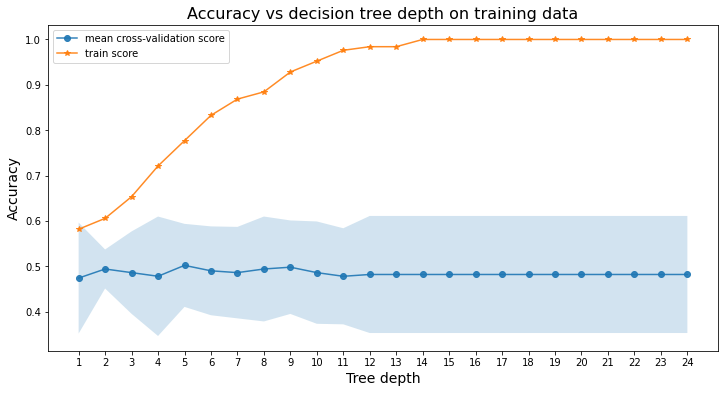

In [209]:
# 9.1 Perform a Classification Tree, where the response is categorical: whether your return was higher or lower than the previous week.(Ties can be ignored).
# Choose a suitable depth of the tree, basing your result on cross-validation

# Categorical variable indicating whether return was higher or lower this week
Class_Y = Y[1:].reset_index(drop=True)>Y[:-1].reset_index(drop=True)
Class_X = X.copy(deep=True)
Class_X.drop(index=Class_X.index[0], axis=0, inplace=True)

# Run cross-validation for tree depth upto 25
depths_list = range(1,25)
class_cv_scores_mean, class_cv_scores_std, class_accuracy_scores = run_cross_validation_on_class_trees(Class_X,Class_Y,depths_list)

# Plotting accuracy for various tree depths
plot_cross_validation_on_trees(depths_list, class_cv_scores_mean, class_cv_scores_std, class_accuracy_scores,
                                'Accuracy vs decision tree depth on training data','Accuracy')

From the figure above, a tree depth of 5 is ideal because it achieves the best average accuracy on cross-validation data. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy tends to decrease.

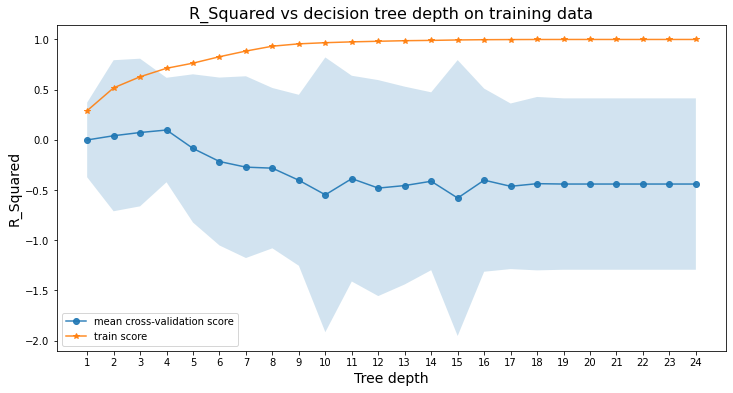

In [210]:
# 9.2 Perform a Regression Tree. The difference here is the response is continuous. This value should be the weekly return that you calculated on each series. Choose a suitable depth of the tree, basing your result on cross-validation

# Response variable to be weekly log return
Reg_Y = np.log(Y[1:].reset_index(drop=True)/Y[:-1].reset_index(drop=True))
Reg_X = np.log(X[1:].reset_index(drop=True)/X[:-1].reset_index(drop=True))

# Run cross-validation for tree depth upto 25
depths_list = range(1,25)
reg_cv_scores_mean, reg_cv_scores_std, reg_accuracy_scores = run_cross_validation_on_reg_trees(Reg_X,Reg_Y,depths_list)

# Plotting accuracy for various tree depths
plot_cross_validation_on_trees(depths_list, reg_cv_scores_mean, reg_cv_scores_std, reg_accuracy_scores,
                                'R_Squared vs decision tree depth on training data','R_Squared')

From the figure above, we observe that the R<sup>2</sup> (explained variance) on cross-validation data is only slightly positive for small depth values and negative thereafter, indicating that the model doesn't fit the data. A tree depth of 4 is ideal because it gives the highest R<sup>2</sup>.

9.3 Which performed better, the classification or the regression tree?

The classification tree performed much better with accuracy around 50%, whereas the regression tree generally very low or negative R<sup>2</sup>.

## Support Vector Machines (SVM)

In [211]:
# 10.1 Instead of running a regression tree, use SVM.  Use the original space of 35 variables

# Split the data into training and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(Reg_X, Reg_Y, train_size=2/3, test_size=1/3)

#Encoding the target Label
lbl = LabelEncoder()
trans_Y = lbl.fit_transform(Y_train)
trans_test_Y = lbl.fit_transform(Y_test)

In [212]:
# Create and train an SVM Classifier
svm_model = SVR() # default kernel is 'rbf'
svm_model.fit(X_train, trans_Y)

# Predict for the test dataset
Y_pred = svm_model.predict(X_test)
mse = mean_squared_error(trans_test_Y, Y_pred)
rmse = np.sqrt(mse)
print("RMSE:",rmse)
print("Accuracy:",svm_model.score(X_test, trans_test_Y))

RMSE: 46.327597117619966
Accuracy: -2.6505960391651477


In [213]:
# 10.2 Choose a kernel. Rerun the SVM.

# Create and train an SVM Classifier with a linear kernel
svm_lin_model = SVR(kernel='linear') 
svm_lin_model.fit(X_train, trans_Y)

# Predict for the test dataset
Y_pred_lin = svm_lin_model.predict(X_test)
mse_lin = mean_squared_error(trans_test_Y, Y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
print("RMSE:",rmse_lin)
print("Accuracy:",svm_lin_model.score(X_test, trans_test_Y))

RMSE: 47.992954456070684
Accuracy: -2.9177723783231326


10.3 Compare the results of the 2 SVMs.  Comment on how well the data is linearly separable.

Using a linear kernel gives much higher RMSE and a much lower accuracy, this indicates that the data is not quite linearly separable.